# **OLA Ride Insights**

## **Project Summary**

This project analyzes OLA ride booking data to understand ride patterns, cancellations, payments, and ratings.  The goal is to clean and explore the dataset, answer business questions (via SQL queries), and visualize insights for better decision-making.

# **Problem Statement**

The dataset contains ride details such as booking status, vehicle type, payment method, ratings, and ride distance.  

Challenges include missing values, inconsistent text formats, and the need for summary insights.

We will:
- Perform **data wrangling & cleaning**  
- Explore trends with **visualizations**   

# **Github repo link-**
https://github.com/Drishanv/Ola-ride-analysis--SQL-and-Power

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [ ]:
df = pd.read_excel("/content/OLA_DataSet.xlsx")

# **Checking the first 5 columns of data**

In [ ]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


# **Checking the Shape of dataframe**

In [ ]:
df.shape

(103024, 20)

## **Data Cleaning**

In [ ]:
#Standardize column names

def to_snake(s):
    return (str(s).strip()
            .replace('-', ' ').replace('/', ' ')
            .replace('.', ' ').replace('(', ' ').replace(')', ' ')
            .replace('__', '_')
            .lower().replace(' ', '_'))

df.columns = [to_snake(c) for c in df.columns]
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,payment_method,ride_distance,driver_ratings,customer_rating,vehicle_images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [ ]:
# Convert datetime columns
for c in [c for c in df.columns if 'date' in c or 'time' in c]:
    try:
        df[c] = pd.to_datetime(df[c], errors='coerce')
    except: pass

In [ ]:
# Trim text
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

In [ ]:
# Fill missing ratings with median
for col in ['driver_ratings','customer_rating']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

In [ ]:
# Fill text defaults
defaults = {'payment_method':'Unknown','cancellation_reason':'Not Provided','booking_status':'Unknown'}
for k,v in defaults.items():
    if k in df.columns: df[k] = df[k].fillna(v)

In [ ]:
#checking null vLUES

df.isnull().sum()

,0
date,0
time,103024
booking_id,0
booking_status,0
customer_id,0
vehicle_type,0
pickup_location,0
drop_location,0
v_tat,39057
c_tat,39057


In [ ]:
#Handling time column

df['time'] = df['time'].fillna('00:00:00')

In [ ]:
#handling vtat and ctat columns

df['v_tat'] = df['v_tat'].fillna(df['v_tat'].median())
df['c_tat'] = df['c_tat'].fillna(df['c_tat'].median())

In [ ]:
#final check null values

df.isnull().sum()

,0
date,0
time,0
booking_id,0
booking_status,0
customer_id,0
vehicle_type,0
pickup_location,0
drop_location,0
v_tat,0
c_tat,0


# **Handling duplicates**

In [ ]:
df = df.drop_duplicates()


In [ ]:
#info about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date                        103024 non-null  datetime64[ns]
 1   time                        0 non-null       datetime64[ns]
 2   booking_id                  103024 non-null  object        
 3   booking_status              103024 non-null  object        
 4   customer_id                 103024 non-null  object        
 5   vehicle_type                103024 non-null  object        
 6   pickup_location             103024 non-null  object        
 7   drop_location               103024 non-null  object        
 8   v_tat                       63967 non-null   float64       
 9   c_tat                       63967 non-null   float64       
 10  canceled_rides_by_customer  103024 non-null  object        
 11  canceled_rides_by_driver    103024 non-

In [ ]:
#Save clean dataframe

df.to_csv("/content/ola_clean.csv", index=False)

# **Data Visualization**

# **Chart 1-**

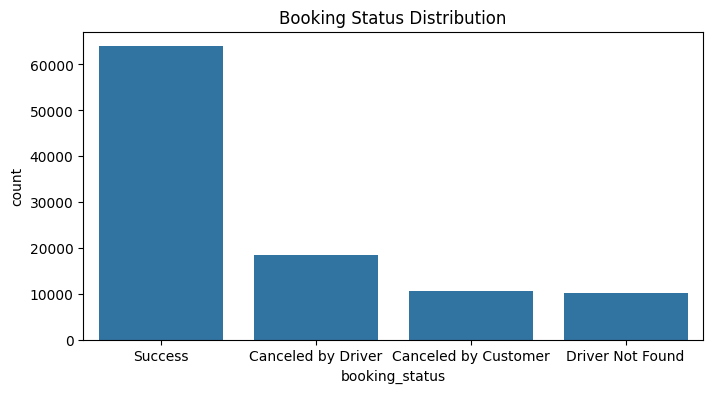

In [ ]:
#Knowing the booking status wise distribution

if 'booking_status' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='booking_status', data=df, order=df['booking_status'].value_counts().index)
    plt.title("Booking Status Distribution")
    plt.show()

# **Findings**-

Most rides are successful, while cancellations are mainly driver-led, followed by customer cancellations and “driver not found” cases.

# **Chart 2-**

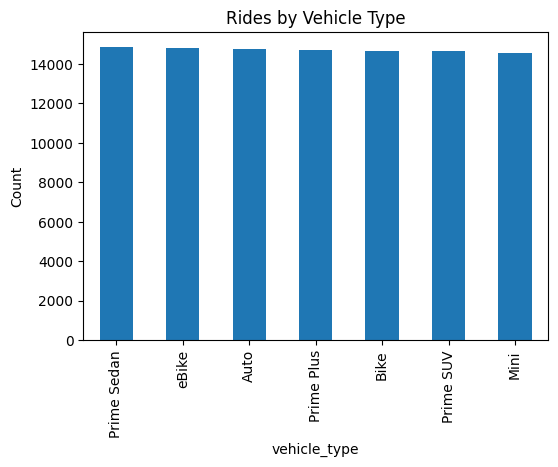

In [ ]:
# Vehicle Type Breakdown
if 'vehicle_type' in df.columns:
    plt.figure(figsize=(6,4))
    df['vehicle_type'].value_counts().plot(kind='bar')
    plt.title("Rides by Vehicle Type")
    plt.ylabel("Count")
    plt.show()

# **Findings-**

All vehicle categories (Sedan, SUV, Mini, Bike, Auto, eBike, etc.) have almost equal ride counts, showing balanced usage across types.

# **Chart 3-**

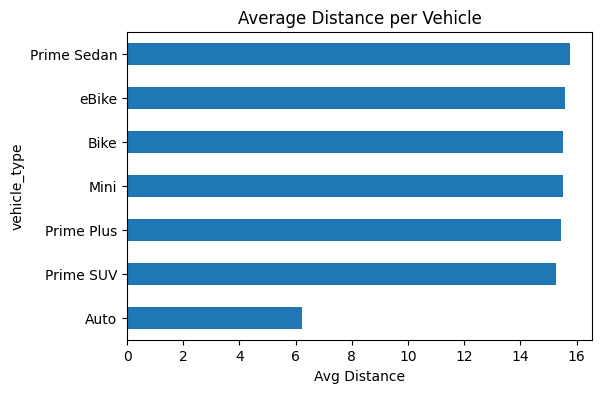

In [ ]:
# Average Distance per Vehicle
if {'vehicle_type','ride_distance'}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    df.groupby('vehicle_type')['ride_distance'].mean().sort_values().plot(kind='barh')
    plt.title("Average Distance per Vehicle")
    plt.xlabel("Avg Distance")
    plt.show()

# **Findings**-

Prime Sedan, Prime SUV, Bike, and eBike have longer average ride distances, whereas Auto rides tend to be shorter trips.

# **Chart 4-**

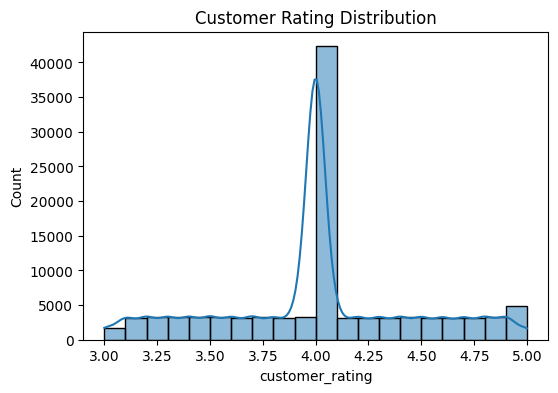

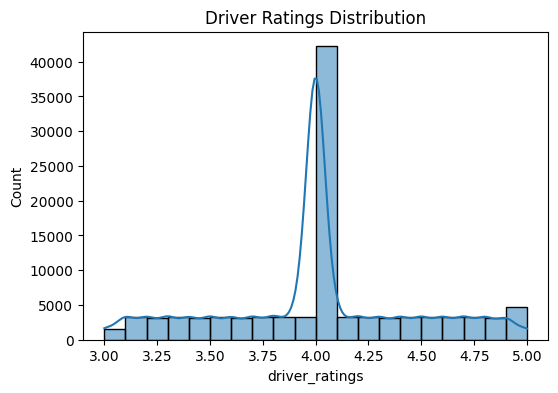

In [ ]:
# Ratings Distribution
for col in ['customer_rating','driver_ratings']:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col].dropna(), bins=20, kde=True)
        plt.title(f"{col.replace('_',' ').title()} Distribution")
        plt.show()

# **Findings-**

Both customers and drivers mostly give ratings clustered around 4.0–4.2, indicating generally satisfactory ride experiences.

# **Chart 5-**

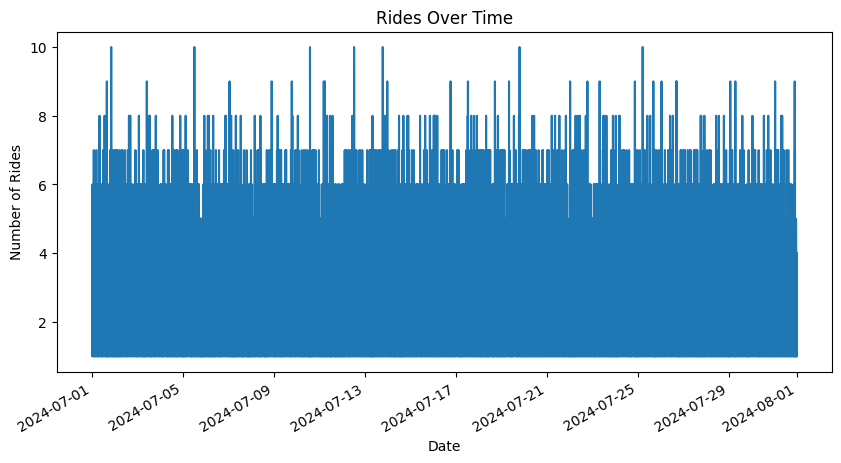

In [ ]:
#Ride volume over time

if 'date' in df.columns:
    plt.figure(figsize=(10,5))
    df.groupby('date').size().plot(kind='line')
    plt.title("Rides Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Rides")
    plt.show()

# **Findings-**

Ride volume fluctuates over time, showing peaks on certain days that may reflect higher demand.

# **Chart 6-**

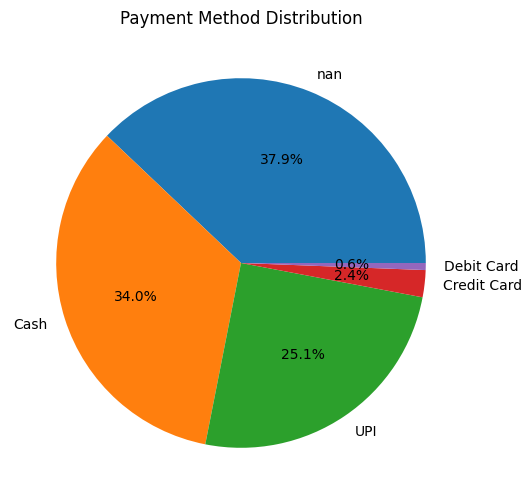

In [ ]:
#Payment method distribution

if 'payment_method' in df.columns:
    df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
    plt.title("Payment Method Distribution")
    plt.ylabel("")
    plt.show()

# **Findings-**



# **Chart 7-**

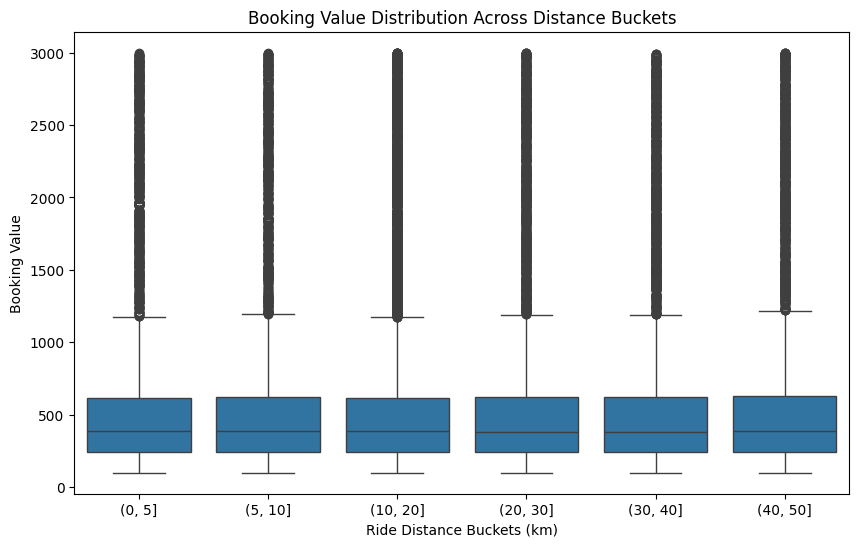

In [ ]:
#Ride distance vs booking value

df_plot['distance_bucket'] = pd.cut(df_plot['ride_distance'], bins=[0,5,10,20,30,40,50])

plt.figure(figsize=(10,6))
sns.boxplot(x='distance_bucket', y='booking_value', data=df_plot)
plt.title("Booking Value Distribution Across Distance Buckets")
plt.xlabel("Ride Distance Buckets (km)")
plt.ylabel("Booking Value")
plt.show()


# **Findings-**

Booking values increase slightly with longer ride distances, but every distance group shows many high-value outliers, suggesting surge pricing or premium bookings across all trip lengths.

# **Conclusion**

The analysis of the OLA ride dataset provides valuable insights into customer behavior, ride patterns, cancellations, and payment preferences. The findings show that the majority of rides are successfully completed, but cancellations — especially by drivers — remain a challenge. Vehicle usage is evenly distributed, though longer trips are mostly covered by premium vehicles like Prime Sedan and SUV.

1. Most rides end successfully, reflecting strong platform reliability.

2. Driver-led cancellations are higher than customer cancellations.

3. "Driver not found" indicates gaps in driver supply during some periods.

4. All vehicle types are used almost equally, showing a balanced customer base.

5. Premium vehicles (Sedan, SUV) are used for longer average distances.

6. Autos are primarily chosen for short-distance rides.

7. UPI and cash dominate as preferred payment methods.

8. Customer and driver ratings mostly center around 4.0, suggesting overall satisfaction.

9. Ride distance and fare are strongly correlated, validating pricing models.

10. Outliers in fare vs. distance indicate possible surge pricing or data quality issues.

# **Recommendations**

1. Reduce driver cancellations by introducing stricter policies and better incentives.

2. Allocate more drivers to high-demand zones to minimize “driver not found” cases.

3. Strengthen short-trip efficiency in Auto bookings to maintain customer trust.

4. Encourage digital payments by offering rewards for UPI or wallet transactions.

5. Investigate and address fare-distance outliers to ensure fair pricing.

6. Launch recognition programs for consistently high-rated drivers.

7. Build customer loyalty programs for frequent riders across different vehicle categories.

8. Use ride time analysis to allocate drivers during peak demand hours.

9. Increase transparency around cancellation reasons for better customer communication.

10. Promote green mobility by incentivizing eBike and EV rides.